In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product, chain, combinations
from scipy import stats
from IPython.display import display, HTML
%matplotlib inline

def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

def get_file_name(name):
    return name.replace(':', '-')

In [15]:
inputFile = 'ib48.csv'

plotSize = (13, 10)
plotStyle = 'seaborn-v0_8-whitegrid'
saveFigures = True

In [16]:
df = pd.read_csv('data/' + inputFile)

bsdf = pd.read_csv('data/bs48.csv')

In [17]:
df['progress'] = (df['timestamp'] - df['timestamp'].min()) / (df['timestamp'].max() - df['timestamp'].min())

bsdf['progress'] = (bsdf['timestamp'] - bsdf['timestamp'].min()) / (bsdf['timestamp'].max() - bsdf['timestamp'].min())

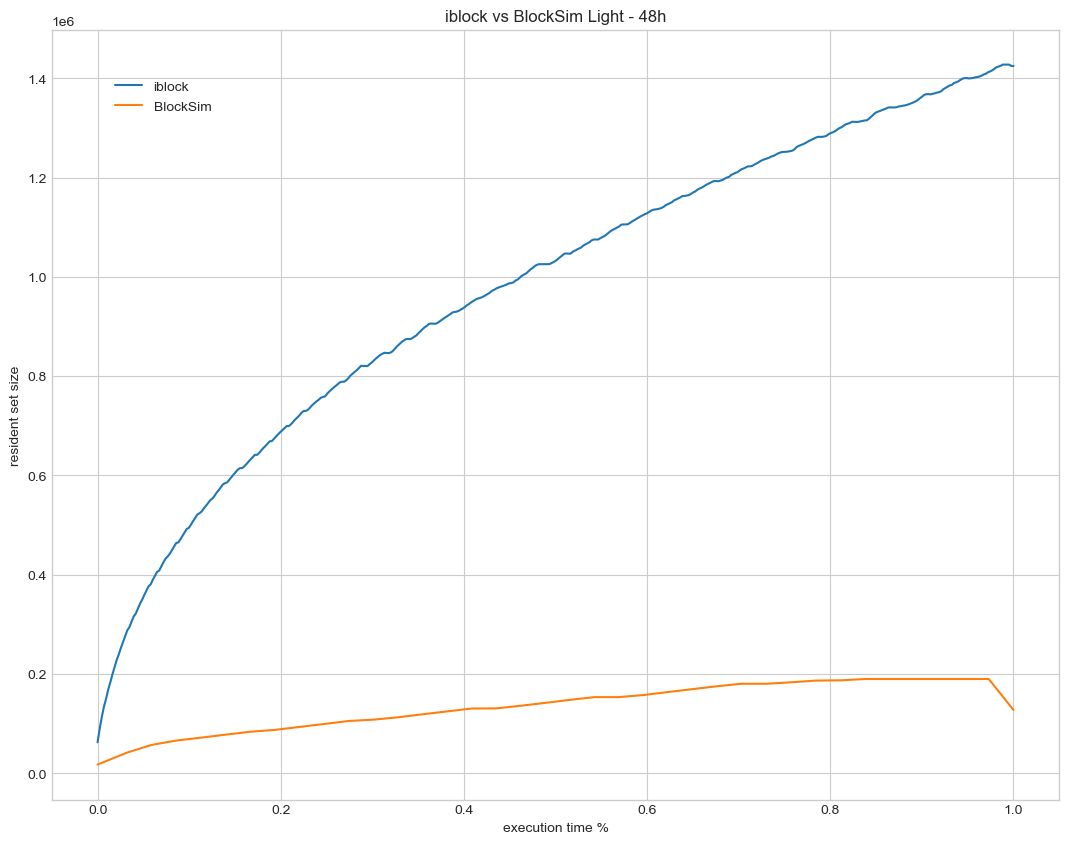

In [18]:
plt.figure(figsize=plotSize)
plt.style.use(plotStyle)
plt.plot(df['progress'], df['rss'], label='iblock')
plt.plot(bsdf['progress'], bsdf['rss'], label='BlockSim')
plt.title('iblock vs BlockSim Light - 48h')
plt.ylabel('resident set size')
plt.xlabel('execution time %')
plt.legend(loc="upper left", bbox_to_anchor=(0.05, 0.95))
if saveFigures:
    plt.savefig('figures/comp48.eps', format='eps')
plt.show()

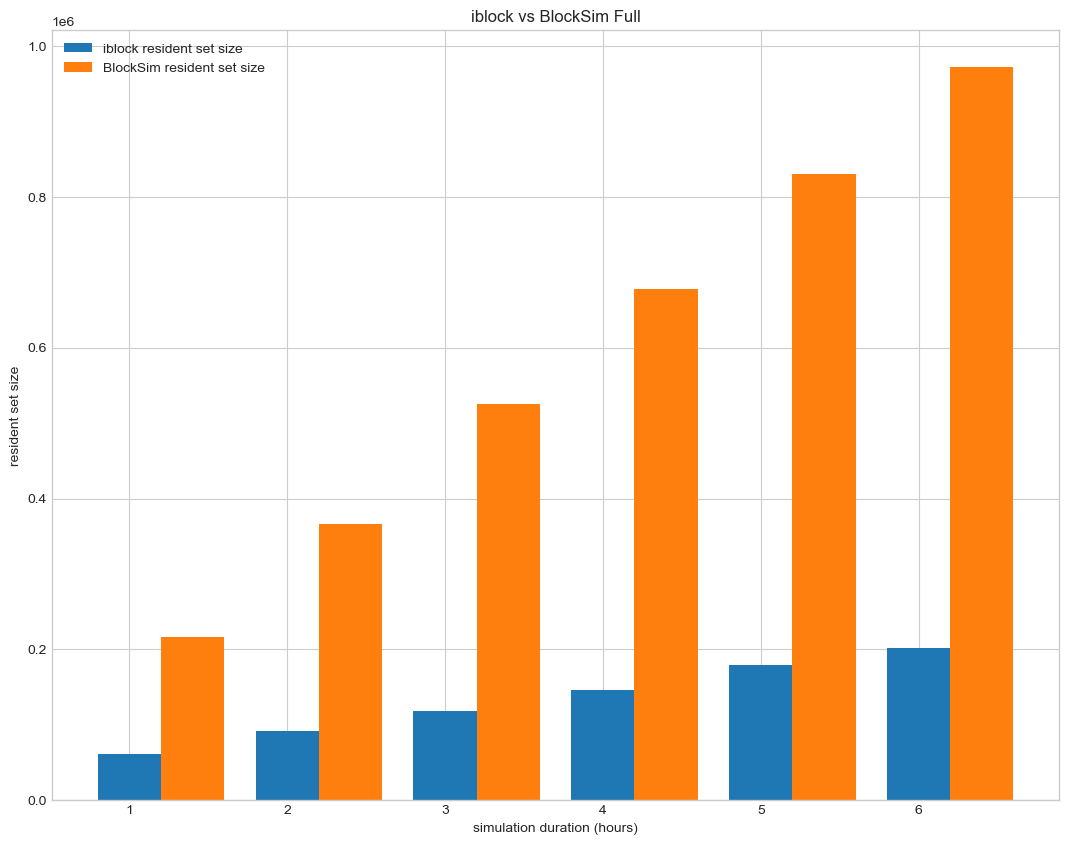

In [21]:
tot = pd.read_csv('data/tot.csv')

barwidth = 0.4

plt.figure(figsize=plotSize)
plt.bar(np.arange(1, 7), tot['ibrss'], barwidth, label="iblock resident set size")
plt.bar(np.arange(1, 7) + barwidth, tot['bsrss'], barwidth, label="BlockSim resident set size")
plt.title('iblock vs BlockSim Full')
plt.ylabel('resident set size')
plt.xlabel('simulation duration (hours)')
plt.legend()
if saveFigures:
    plt.savefig('figures/compfull.eps', format='eps')
plt.show()

# plt.figure(figsize=(10, 100))
# plt.bar(np.arange(1, 7), tot['ibtime'], barwidth, label="iblock time")
# plt.bar(np.arange(1, 7) + barwidth, tot['bstime'], barwidth, label="BlockSim time")
# plt.legend()
# plt.show()